<a href="https://colab.research.google.com/github/Rishi500/Face_Recog/blob/master/jaffe_fastai_alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [0]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"rishi500","key":"31bae42537b6b7321ed7f577ebf60bb0"}'}

In [4]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
! cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list


ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)    2GB  2020-05-02 20:35:01          60980  
divyansh22/us-border-crossing-data                          US Border Crossing Data                               2MB  2020-04-19 09:38:10            798  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                          142MB  2020-04-29 22:47:23           6713  
baltacifatih/turkish-lira-banknote-dataset                  Turkish Lira Banknote Dataset                         3GB  2020-04-19 14:48:39             84  
doaaalsenani/usa-cers-dataset                               US C

In [8]:
!kaggle datasets list -s 'jaffe'

ref                                                        title                                              size  lastUpdated          downloadCount  
---------------------------------------------------------  -------------------------------------------------  ----  -------------------  -------------  
andrewmvd/japanese-female-facial-expression-dataset-jaffe  Japanese Female Facial Expression Dataset (JAFFE)  12MB  2020-04-08 06:05:20             56  
kmader/crowds-cure-cancer-2017                             Crowds Cure Cancer 2017                            19GB  2018-06-11 15:55:19            945  
ankur133047/modified-jaffe-facial-expression-dataset       modified_JAFFE                                     30MB  2018-11-06 09:44:00            123  
ankur133047/jaffe-landmarks-lbp                            jaffe_landmarks_lbp                                49KB  2018-11-06 09:01:16             21  
signoreankit/offtsjaffer                                   offtsjaffer            

In [9]:
!kaggle datasets download 'ankur133047/modified-jaffe-facial-expression-dataset'

modified-jaffe-facial-expression-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip -q -n /content/modified-jaffe-facial-expression-dataset.zip

In [11]:
!ls

 jaffe		   'kaggle (1).json'				   sample_data
 jaffe_pixels.csv   kaggle.json
 jaffe.zip	    modified-jaffe-facial-expression-dataset.zip


In [0]:
path = 'jaffe/jaffe'

In [0]:
from fastai import *
from fastai.vision import *

In [14]:
!pip install "torch==1.4" "torchvision==0.5.0"

In [0]:
np.random.seed(42)
tfms = tfms = get_transforms(flip_vert=False, do_flip=True, max_rotate = 10.0, max_zoom = 1.1 )
data = ImageDataBunch.from_folder(path=path, ds_tfms = tfms, train=".",valid_pct = 0.20,
         size=256, bs = 35 , num_workers=4).normalize(imagenet_stats)

In [40]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['0', '1', '2', '3', '4', '5', '6'], 7, 171, 42)

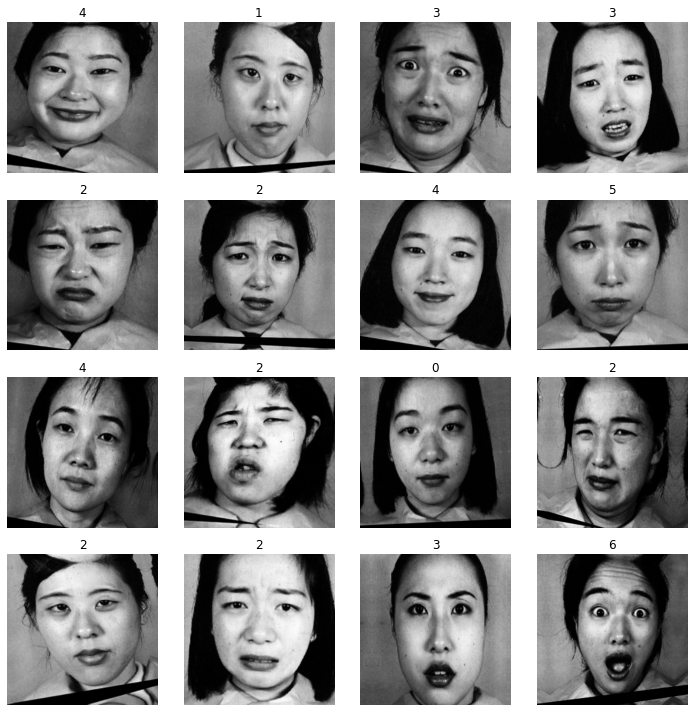

In [41]:
data.show_batch(rows=4,figsize=(10,10))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


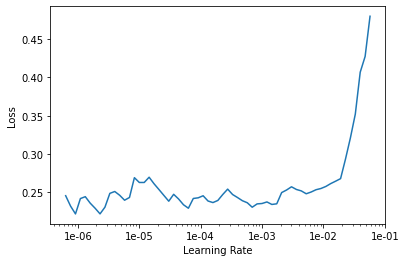

In [43]:
learner.lr_find()
learner.recorder.plot()

In [115]:
learner=cnn_learner(data,models.alexnet,metrics=accuracy)
learner.fit_one_cycle(30)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


epoch,train_loss,valid_loss,accuracy,time
0,3.317909,5.153010,0.119048,00:02
1,3.298084,3.201316,0.119048,00:01
2,3.245843,2.371380,0.190476,00:01
3,3.112915,1.958943,0.238095,00:01
4,2.979412,1.757746,0.333333,00:01
5,2.825623,1.714388,0.333333,00:01
6,2.616450,1.638318,0.452381,00:01
7,2.449914,1.524387,0.404762,00:01
8,2.304602,1.375096,0.404762,00:01
9,2.201120,1.330789,0.404762,00:01


In [0]:
learner.save('stage1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


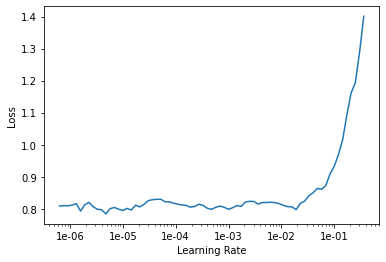

In [117]:
learner.lr_find()
learner.recorder.plot()

In [0]:
learner.unfreeze()

In [119]:
learner.fit_one_cycle(30,max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.834698,1.031259,0.666667,00:02
1,0.803187,1.041955,0.642857,00:02
2,0.802387,1.045092,0.642857,00:01
3,0.766883,1.117039,0.619048,00:01
4,0.758571,1.134282,0.595238,00:01
5,0.749216,1.245438,0.595238,00:01
6,0.795926,0.864310,0.690476,00:01
7,0.783101,0.741517,0.714286,00:01
8,0.772815,1.014941,0.785714,00:01
9,0.743701,1.287666,0.666667,00:02


In [0]:
learner.save('stage2')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


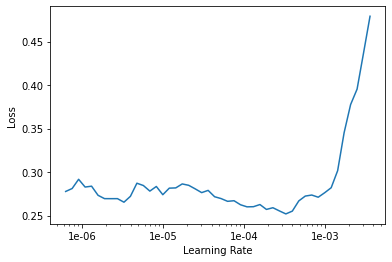

In [121]:
learner.lr_find()
learner.recorder.plot()

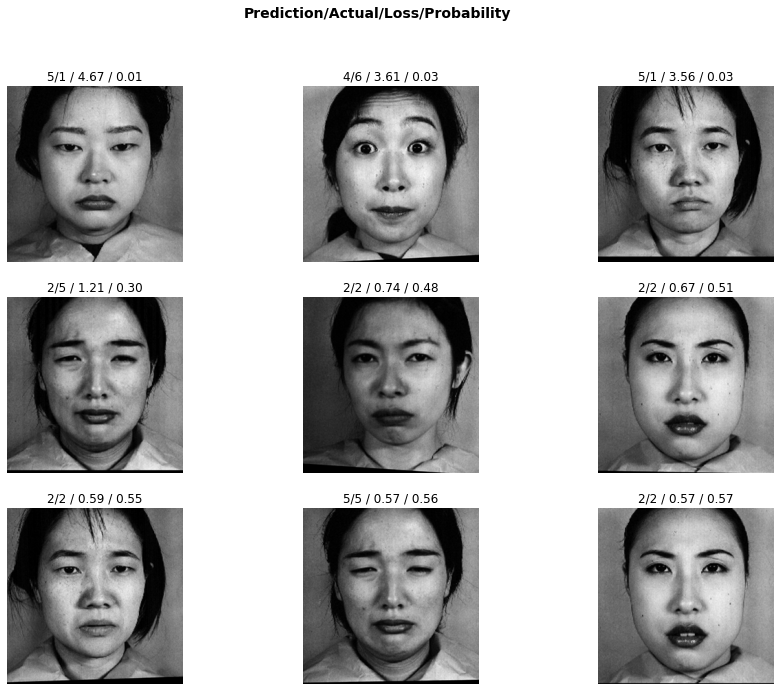

In [122]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_top_losses(9, figsize=(15,11))

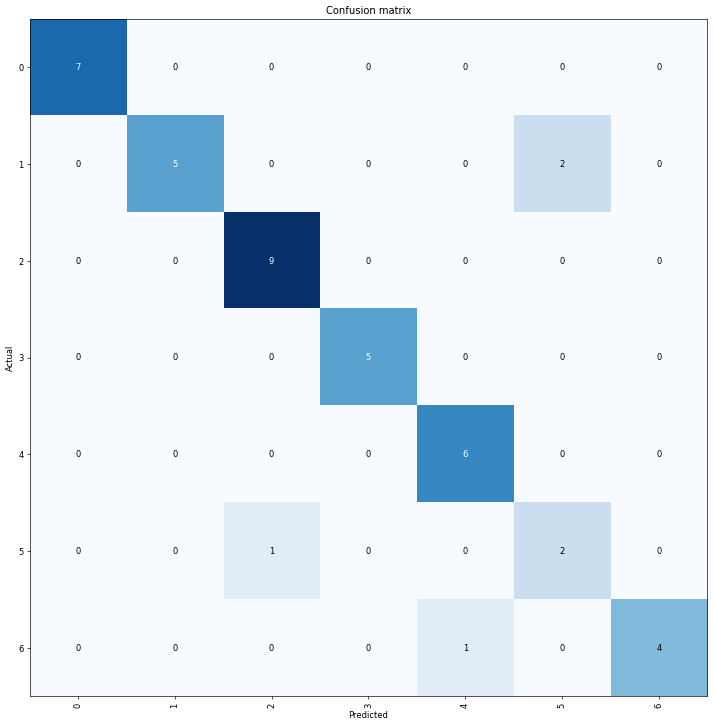

In [123]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [124]:
learner.unfreeze()
learner.fit_one_cycle(5, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.295338,0.446552,0.904762,00:02
1,0.309303,0.469507,0.880952,00:02
2,0.308801,0.500830,0.880952,00:02
3,0.299755,0.463280,0.928571,00:02
4,0.272756,0.456267,0.928571,00:02


In [0]:
learner.save('stage3')

In [0]:
#Created by Rishi J